**Table Of Contents**


1.   [Problem Statement](#section1)<br>
2.   [Importing Packages](#section1)<br>
3.   [Loading Data](#section1)<br>        
    - 3.1  [Description Of DataSet](#section401)<br>  
    - 3.2  [Pandas Profliling using D-Tale](#section401)<br>    
                            
4.   [Data Reprocessing](#section1)<br>
    - 4.1  [Data Reprocessing by removing ouliers and correcting the null balues and misisng one](#section401)<br>  
    - 4.2  [Data profiling after Processing ](#section401)<br>  

5.   [Explortory Data Analysis](#section1)<br>
    - 5.1  [What are most listing that people prefer to live in](#section401)<br>  
    - 5.2  [Top 100 neighhbours living near listing ](#section401)<br>  
    - 5.3  [Types of room available in Listing ](#section401)<br>  
    - 5.4  [Top 10 lisiting in terms of Price ](#section401)<br>  
    - 5.5  [Maximum Reviews Recieved on Day of week ](#section401)<br>  
    - 5.6  [Top 10 Cities having Listin ](#section401)<br>  

6.   [Bivariate Analysis/Comparing columns](#section1)<br>
    - 6.1  [Room_Type Vs Price](#section401)<br>  
    - 6.2  [City Vs Price ](#section401)<br>  
    - 6.3  [Minimum_Nights Vs Price ](#section401)<br>  
    - 6.4  [Name Vs Price ](#section401)<br>  
    - 6.5  [Host_name Vs Price ](#section401)<br>  
    - 6.6  [Availability_365 Vs Price ](#section401)<br> 
    - 6.7  [reviews Vs Price ](#section401)<br>   


7.   [Geo Graphs](#section1)<br>
    - 7.1  [Number Of Listings By State ](#section401)<br>  
    - 7.2  [Average Listing Price At Each State on Geo graph ](#section401)<br>  
    - 7.3  [Average Listing Number Of Reviews At Each State  ](#section401)<br> 
    - 7.4  [average Listing Availability At Each State ](#section401)<br>   
8.   [Multivariate Analysis](#section1)<br>
9.   [Conclusions](#section1)<br>
10.  [Actionable Insights](#section1)<br>
11.  [Machine Learning](#section1)<br>

     - 11.1  [Linear Regression ](#section401)<br>  
     - 11.2  [Decision Tree Regressor ](#section401)<br>  
     - 11.3  [RandomForestRegressor ](#section401)<br> 

     [Comparision of Models](#section401)<br> 


















**1 . Problem Statement**


Since its inception in 2008, Airbnb has disrupted the traditional hospitality industry as more travellers decide to use Airbnb as their primary means of accommodation. Airbnb offers travellers a more unique and personalized way of accommodation and experience.
**Therefore the problem is to predict the price of house using Machone learning Algorithm**

**2 .  Importing Packages**

In [ ]:
#import packages like numpy,pandas 
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
      # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [ ]:
# import libraries such as matlplotlib and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
!pip install -U plotly
import plotly.express as ex
from plotly.offline import init_notebook_mode, iplot

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


In [ ]:
# Making plotly specific imports

# pip install chart-studio

'''
# If you're using an older version of plotly, you might have to import the below modules as well.
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)
'''

import plotly.graph_objs as go

**3.   Loading Data Set**

In [ ]:
#loading data set using read_csv function
house_bnd=pd.read_csv('/content/AB_US_2020.csv')
house_bnd

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


**3.1  Description of Dataset**

In [ ]:
#to view the data rows
house_bnd.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [ ]:
# to know the data types of columns
house_bnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     



1.   There are some **226030** **rows** and **17** **columns**
2.   There are **7** **columns** with **integer** value ,**7** **columns** with **object** as value and **3** **columns** as **float** which comprises of **latitude** ,**longitude** and **reviews per month**.
3.   There are many columns with **empty** **values** like **last_review,neighbourhood_group,name** and **reviews_per_month**






In [ ]:
#will describe the columns
house_bnd.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000




1.   **Price** has max of **24999** which can be outlier as **mean** is **219** and **median** is **121** so it is **rightly** **skewed** and minimum value if 0
2.   **availability_365** is **normally distributed** as **mean** and **median** is almost same to 159 and 140 respectively.
3.   Here one thing to note is the range for **latitude** for US is **between 19.50139 to 64.85694** so we have some oulier here also with latitude **less then 19.50139**






**3.2 Pandas profiling using D-Tale**

In [ ]:
#to intsall dtale ,which is one of best profiling technique
#intsalling d-tale using pip install
!pip install dtale

In [ ]:
#importing d-tale
import dtale
house_bnd.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [ ]:
#import d-tale profiling
import dtale.app as dtale_app

dtale_app.USE_COLAB = True
dtale.show(house_bnd,ignore_duplicate=True)


https://v17hogzy6i-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/3



1.   Analyzing columns from the dtale we found that there are columns names as **name,host_name,neigbiurhood,last_review and reviews_per_months** as some of the values as missing

2.   WE can also see some ouliers in the columns anmed as **price,minimum_nights,number_of_reviews,reviews_per_month and calculated_host_listing_count**

3.   Here one thing to note is the range for latitude for US is between 19.50139 to 64.85694 so we have some oulier here also with latitude less then 19.50139






**4.Data Preprocessing**

In [ ]:
#will check whcih columns has missing values
house_bnd.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64



1.   We can see that columns  **name,host_name ,neighbourhood,last_review and reviews_per-month** has null values in it ,so will check how to deal with them




In [ ]:
#percenatage of columns neighbourhood as empty
perce_null_neig=(115445/house_bnd.shape[0])*100
print("the percenatge of empty values in neighbourhood_group coumns is ",format(perce_null_neig))

the percenatge of empty values in neighbourhood_group coumns is  51.07507852939875


**4.1 Data Reprocessing**

In [ ]:
#will drop a column  as it is more then 51 % empty 
house_bnd.drop(columns='neighbourhood_group',axis=1,inplace=True)

In [ ]:
house_bnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood                   226030 non-null  object 
 5   latitude                        226030 non-null  float64
 6   longitude                       226030 non-null  float64
 7   room_type                       226030 non-null  object 
 8   price                           226030 non-null  int64  
 9   minimum_nights                  226030 non-null  int64  
 10  number_of_reviews               226030 non-null  int64  
 11  last_review                     177428 non-null  object 
 12  reviews_per_mont

In [ ]:
#will replace column name with mode as 28 values are missing in it so being  a categriocal columns mode is best option ,same for host_name which has 33 missing
#will replace last_review with mode as 21.5 is missing 
#will replace reviews_per_month with mode 
#in the end will convert last_review colum to datetime

house_bnd['name'].fillna(house_bnd['name'].mode()[0], inplace=True)    #will replace name with mode 
house_bnd['host_name'].fillna(house_bnd['host_name'].mode()[0], inplace=True)  #will replace host_name with mode 
house_bnd['last_review'].fillna(house_bnd['last_review'].mode()[0], inplace=True)   #will replace last_review with mode 
house_bnd['reviews_per_month'].fillna('1.4315', inplace=True)   #will replace reviews_per_month with median =1.4315 
house_bnd["last_review"]= pd.to_datetime(house_bnd["last_review"]) 

In [ ]:
#will corss check if any column still has null values
house_bnd.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [ ]:
#checking the columns info
house_bnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              226030 non-null  int64         
 1   name                            226030 non-null  object        
 2   host_id                         226030 non-null  int64         
 3   host_name                       226030 non-null  object        
 4   neighbourhood                   226030 non-null  object        
 5   latitude                        226030 non-null  float64       
 6   longitude                       226030 non-null  float64       
 7   room_type                       226030 non-null  object        
 8   price                           226030 non-null  int64         
 9   minimum_nights                  226030 non-null  int64         
 10  number_of_reviews               226030 non-null  int64  

In [ ]:
#the values of price in column price
house_bnd.iloc[house_bnd['price'].sort_values(ascending=False)[:90].index, :]['price']


191364    24999
61941     24999
191366    24999
191365    24999
186326    24999
          ...  
212798    10000
193155    10000
43898     10000
193405    10000
3150      10000
Name: price, Length: 90, dtype: int64

In [ ]:
#to get the max ,min and mean of price in price colimn
print("the maximum price is",house_bnd.price.max())
print("the minimum price is",house_bnd.price.min())
print("the mean price is",house_bnd.price.mean())

the maximum price is 24999
the minimum price is 0
the mean price is 219.71652877936558




1.   So in price column we have some outliers with maximum value as 24999 and minimum value as 0 with mean as 219,so will try to bring in the range .
2.   We will use **IQR (inter quartile range)** to remove outliers from price column



In [ ]:
#calculating upper bound of price which mean+ 3 times of standard deviation of price 
#here 3 is 3 standard deviation we can also rtake 1 and 2 standard deviation too for calculation
upper_bound=house_bnd.price.mean() + 3*house_bnd.price.std()
upper_bound 

1930.7773563212904

In [ ]:
#lower bound which 3 times the minis of mean
lower_bound=house_bnd.price.mean() - 3*house_bnd.price.std()
lower_bound 

-1491.3442987625594

In [ ]:
#will calculate the rows having price more then ipper bound which is 1930
house_bnd.loc[house_bnd['price']>=1930].shape

(1945, 16)

In [ ]:
#will remove the rows from dataset with price greater then 1930
house_bnd.loc[house_bnd['price']<=1930]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.651460,-82.627920,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,28801,35.597790,-82.555400,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.606700,-82.555630,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.578640,-82.595780,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,28801,35.614420,-82.541270,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,2020-03-15,1.4315,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,2020-03-15,1.4315,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,2020-03-15,1.4315,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,2020-03-15,1.4315,5,362,Washington D.C.




1.   Now will remove the outlier in latitude as the range for **U.S. is 19.50139 to 64.85694** but here some values are **less then 19.50**so will remove the rows containg this values




In [ ]:
house_bnd.loc[house_bnd['latitude']>=19.50139].shape

(225106, 16)



1.   Here we can assume that every person filles the reviews from the family and this is reason why we have reviews_per_month more as compared to normal scenario
2.   other scenario was of price in which we have removed the value more then 1930 



In [ ]:
#will drop rows with price more then 1930
house_bnd_notnull=house_bnd.copy()   #will make copy of dataset
house_bnd_notnull.info()

indexnames=house_bnd_notnull[house_bnd_notnull['price']>=1930].index   #will remove the rwos that contains the price more then 1930

house_bnd_notnull.drop(indexnames,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              226030 non-null  int64         
 1   name                            226030 non-null  object        
 2   host_id                         226030 non-null  int64         
 3   host_name                       226030 non-null  object        
 4   neighbourhood                   226030 non-null  object        
 5   latitude                        226030 non-null  float64       
 6   longitude                       226030 non-null  float64       
 7   room_type                       226030 non-null  object        
 8   price                           226030 non-null  int64         
 9   minimum_nights                  226030 non-null  int64         
 10  number_of_reviews               226030 non-null  int64  

In [ ]:
house_bnd_notnull['name'].sort_values(ascending=True)

189183                                                     
189202                                                     
193299           Beach-Zen Condo w/Patio, A/C, & Free Bikes
173675             CLEAN & STYLISH bedroom on the East Side
217145        Fab Minneapolis Duplex- EZ park, close to UMN
                                ...                        
157092    üòçL@@K!üòç Sunlit 3 bedroom in 20ft wide br...
135265    ü•Ç AMAZING STUDIO IN CHINATOWN | üöá CLOSE ...
41073     ü•ÇESCAPE to MGM Signature BALCONY StripView-...
31137     ü•áüîùprivate home Ukrainian Village best pl...
150167    ü™ÅLARGE PRIVATE TERRACE üö∂‚Äç‚ôÇÔ∏è8 MIN W...
Name: name, Length: 224085, dtype: object

In [ ]:
# will drop the values from latitude column which hs values less then 19.50139
house_bnd_notnull.drop(house_bnd_notnull.index[house_bnd_notnull['latitude'] <= 19.50139], inplace = True,axis=0)

**4.2Data After Processing**

In [ ]:
#will look into columns after processing
house_bnd_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223164 entries, 0 to 226029
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              223164 non-null  int64         
 1   name                            223164 non-null  object        
 2   host_id                         223164 non-null  int64         
 3   host_name                       223164 non-null  object        
 4   neighbourhood                   223164 non-null  object        
 5   latitude                        223164 non-null  float64       
 6   longitude                       223164 non-null  float64       
 7   room_type                       223164 non-null  object        
 8   price                           223164 non-null  int64         
 9   minimum_nights                  223164 non-null  int64         
 10  number_of_reviews               223164 non-null  int64  

**5. Exploratory Data Analysis**

**5.1 What are some top Listings people prefer to book**

Text(0.5, 1.0, 'Count  Vs Name')

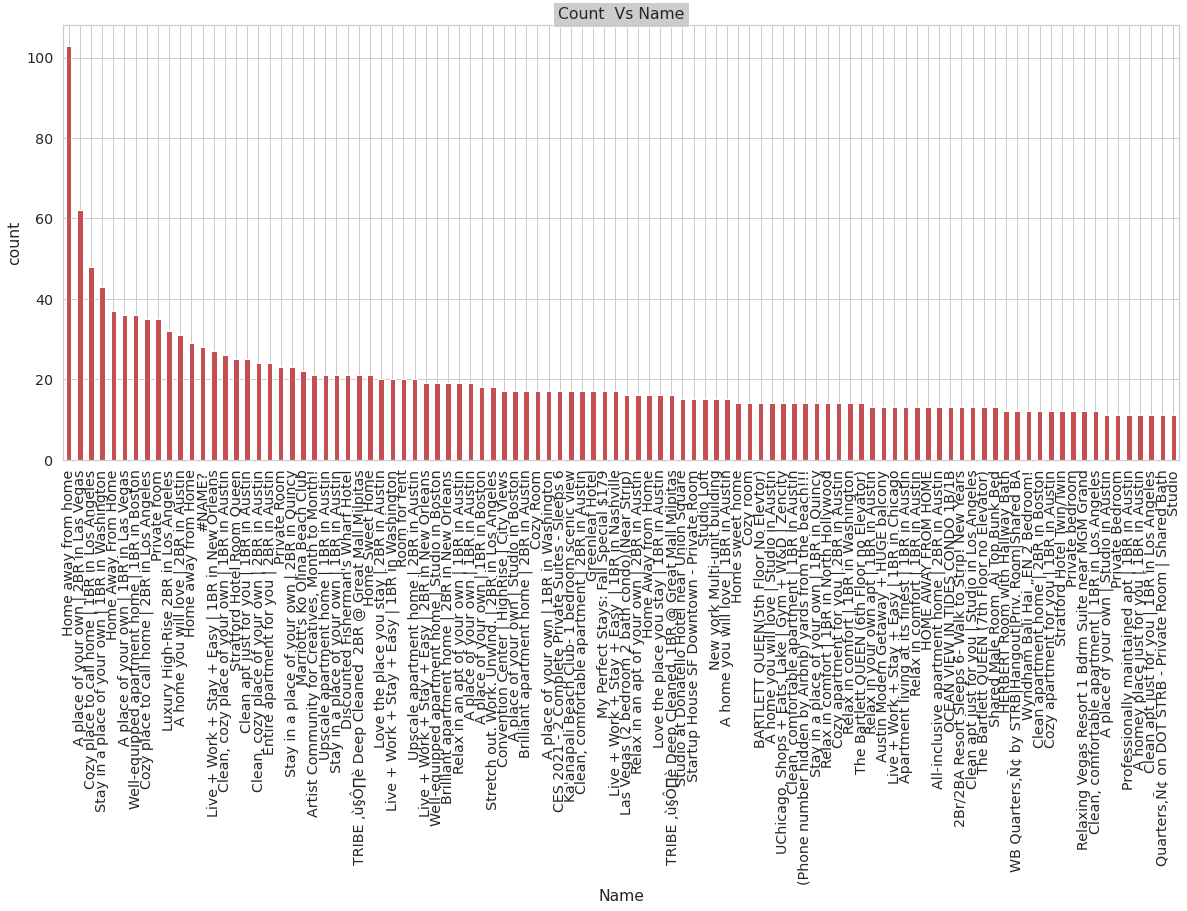

In [ ]:
plt.figure(figsize = (20, 8))
house_bnd_notnull['name'].value_counts()[:100].plot(kind='bar', color='r')
plt.xlabel('Name')
plt.ylabel('count')
plt.title("Count  Vs Name",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#to know the name with hhihest frequecny
house_bnd_notnull.name.value_counts().sort_values(ascending=False)[:50]

Home away from home                                     103
A place of your own | 2BR in Las Vegas                   62
Cozy place to call home | 1BR in Los Angeles             48
Stay in a place of your own | 1BR in Washington          43
Home Away From Home                                      37
A place of your own | 1BR in Las Vegas                   36
Well-equipped apartment home | 1BR in Boston             36
Cozy place to call home | 2BR in Los Angeles             35
Private room                                             35
Luxury High-Rise 2BR in Los Angeles                      32
A home you will love | 2BR in Austin                     31
Home away from Home                                      29
#NAME?                                                   28
Live + Work + Stay + Easy | 1BR in New Orleans           27
Clean, cozy place of your own | 1BR in Austin            26
Stratford Hotel Room Queen                               25
Clean apt just for you | 1BR in Austin  



1.    **There on plotting Frequency Vs name we found that 
belwo are top 5 names people prefer for Air BNB
Home away from home** :-                                    

*   2A place of your own | 2BR in Las Vegas   
*   Cozy place to call home | 1BR in Los Angeles 
*   Stay in a place of your own | 1BR in Washington    
*   Home Away From Home  
*   Well-equipped apartment home | 1BR in Boston                                   











                
            
      




**5.2 Top 100 Neighbours living near listing**

Text(0.5, 1.0, 'Frequecy  Vs Neighbourhood')

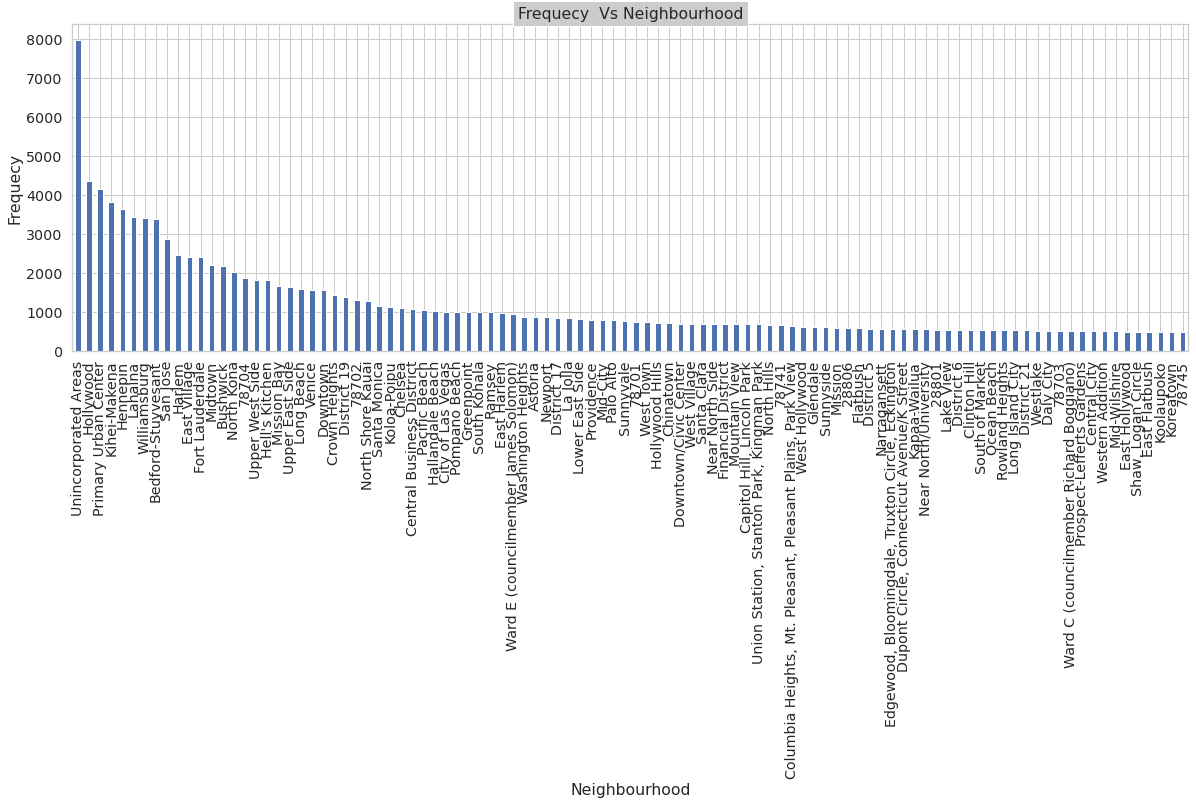

In [ ]:
plt.figure(figsize = (20, 6))
house_bnd_notnull['neighbourhood'].value_counts()[:100].plot(kind='bar', color='b')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequecy')
plt.title("Frequecy  Vs Neighbourhood",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#count of neighbourhood 
house_bnd_notnull.neighbourhood.value_counts().sort_values(ascending=False)[:250]

Unincorporated Areas                      7974
Hollywood                                 4364
Primary Urban Center                      4154
Kihei-Makena                              3826
Hennepin                                  3630
                                          ... 
Old Town                                   209
Mira Mesa                                  207
Back Bay                                   206
Marina del Rey                             206
Ward B (councilmember Mira Prinz-Arey)     206
Name: neighbourhood, Length: 250, dtype: int64

**Neighbourhood are as under** Unincorporated Area,Hollywood and Primary Urban Center                                


**5.3 Type of room available in listing**

In [ ]:
#how many types of room_typem
house_bnd_notnull['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

Text(0.5, 1.0, 'Frequecy  Vs Neighbourhood')

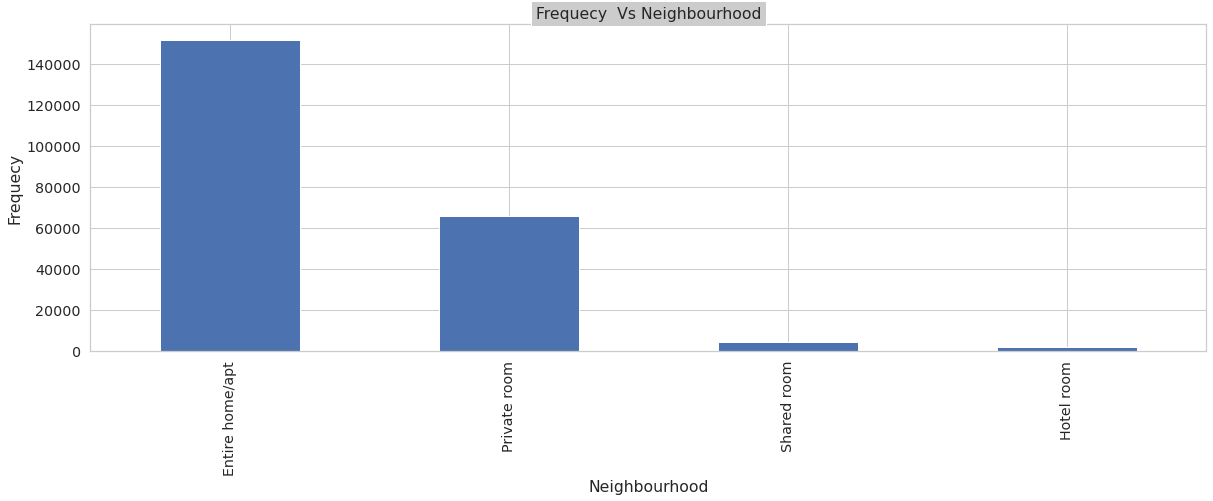

In [ ]:
#plotting neighbourhood vs count on bar grpah
plt.figure(figsize = (20, 6))
house_bnd_notnull['room_type'].value_counts().plot(kind='bar', color='b')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequecy')
plt.title("Frequecy  Vs Neighbourhood",bbox={'facecolor':'0.8', 'pad':5})

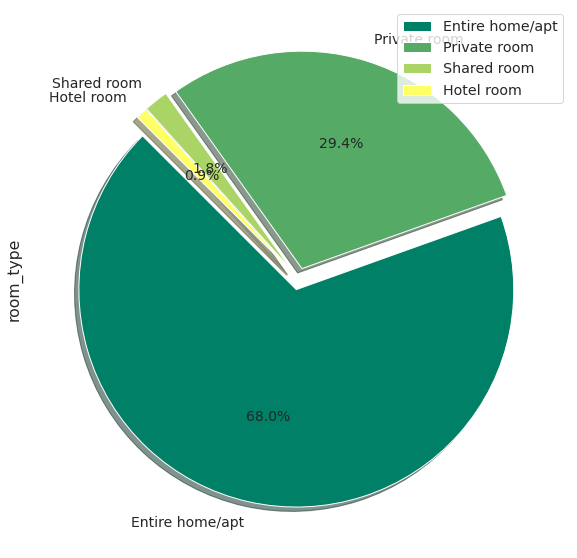

In [ ]:
#plotting pie chart for room_type
house_bnd_notnull['room_type'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

In [ ]:
#preference of room tye mostly prefeered
house_bnd_notnull.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    151677
Private room        65575
Shared room          4015
Hotel room           1897
Name: room_type, dtype: int64

Therefore plotting room_type we found that people prefer **Entire home/apt** as compared to other options .

In [ ]:
#number of unique values of mimimum nights spent
house_bnd_notnull['minimum_nights'].nunique()

169

In [ ]:
#no of nights spend is 1 ,2 and 30 days
house_bnd_notnull.minimum_nights.value_counts().sort_values(ascending=False)[:10]

1     59504
2     54278
30    33304
3     30328
4      9365
5      9250
7      7358
31     3818
14     2085
6      1970
Name: minimum_nights, dtype: int64

Text(0.5, 1.0, 'Minimum_nights  Vs Frequecy')

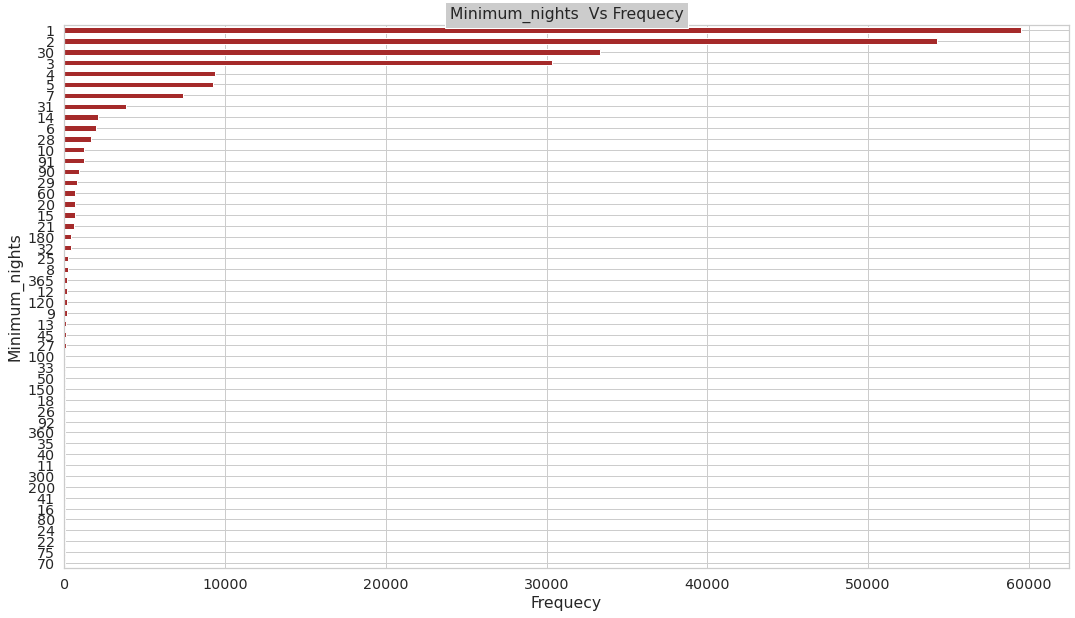

In [ ]:
#no of nights spend is 1 ,2 and 30 days
plt.figure(figsize=(18,10))
house_bnd_notnull.minimum_nights.value_counts()[:50].sort_values(ascending=True).plot(kind='barh',color='Brown')
plt.xlabel('Frequecy')
plt.ylabel('Minimum_nights')
plt.title("Minimum_nights  Vs Frequecy",bbox={'facecolor':'0.8', 'pad':5})

**5.4 Top 10 Price of Listing and highest Frequecy price vice**

In [ ]:
#Top 10 prices
house_bnd_notnull['price'].sort_values(ascending=False)[:20]


221798    1929
39951     1929
60685     1929
4236      1929
39350     1929
42235     1926
221158    1925
48921     1925
38887     1924
31586     1921
54874     1920
103795    1917
96230     1917
78218     1913
42120     1908
114251    1907
56152     1901
76505     1900
101813    1900
7820      1900
Name: price, dtype: int64

In [ ]:
#price of house with highest count 
house_bnd_notnull.price.sort_values(ascending=False).value_counts()[:10]
#house_bnd_notnull.groupby('price')['price'].count().sort_values(ascending=True)


100    5814
150    5704
75     4687
50     4393
80     3895
200    3795
125    3776
99     3761
60     3750
65     3533
Name: price, dtype: int64

In [ ]:
#count of listing having maximum price which is 1929
house_bnd_notnull.loc[house_bnd_notnull['price']==1929].shape

(5, 16)

In [ ]:
#count of lisitng having price equal to 100
house_bnd_notnull.loc[house_bnd_notnull['price']==100].shape

(5814, 16)

Text(0.5, 1.0, 'Frequecy  Vs Price')

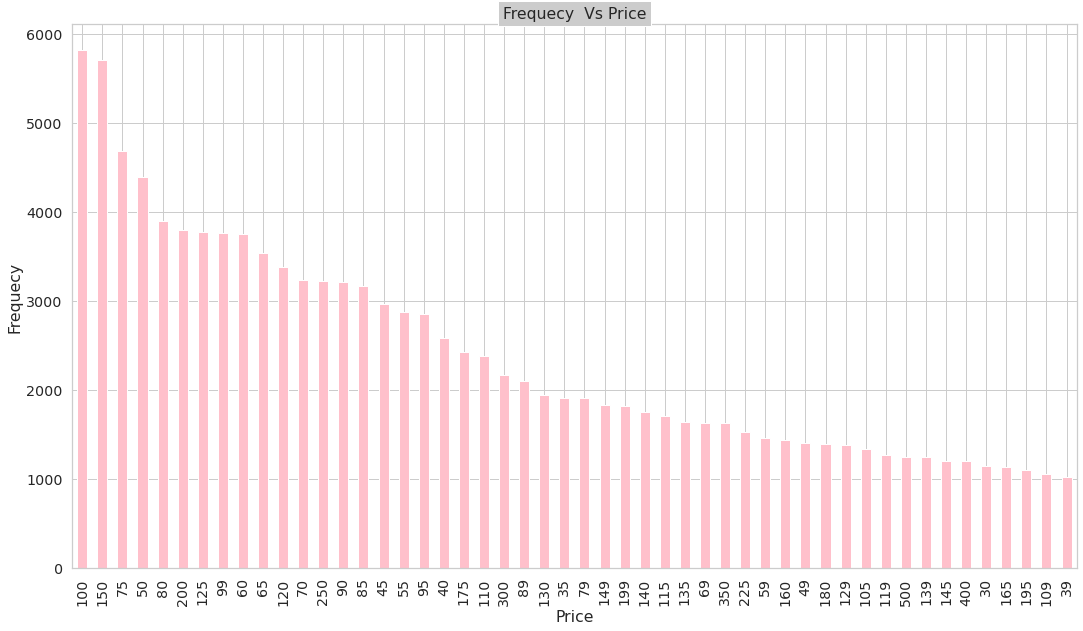

In [ ]:
#no of nights spend is 1 ,2 and 30 days
plt.figure(figsize=(18,10))
house_bnd_notnull.price.value_counts()[:50].sort_values(ascending=False).plot(kind='bar',color='Pink')
plt.xlabel('Price')
plt.ylabel('Frequecy')
plt.title("Frequecy  Vs Price",bbox={'facecolor':'0.8', 'pad':5})

Therefore most price range is as **100, 150 and 75 w**hich people give also one thing to note is that people have price as 0 and 1 which we have to see more in detail

In [ ]:
#count of lisitng j=having price less then 10
house_bnd_notnull.loc[house_bnd_notnull['price']<=10].shape

(146, 16)

In [ ]:
#number of reviews recieved
house_bnd_notnull.number_of_reviews.value_counts().sort_values(ascending=False)[:10]

0    47179
1    19299
2    12100
3     8924
4     7014
5     5824
6     4939
7     4416
8     3972
9     3641
Name: number_of_reviews, dtype: int64

In [ ]:
#max and minimum reviews is
print("The maximum reviews is ",house_bnd_notnull.number_of_reviews.max())
print("The minimum reviews is ",house_bnd_notnull.number_of_reviews.min())

The maximum reviews is  966
The minimum reviews is  0


Text(0.5, 1.0, 'Frequecy  Vs Number_of_reviews')

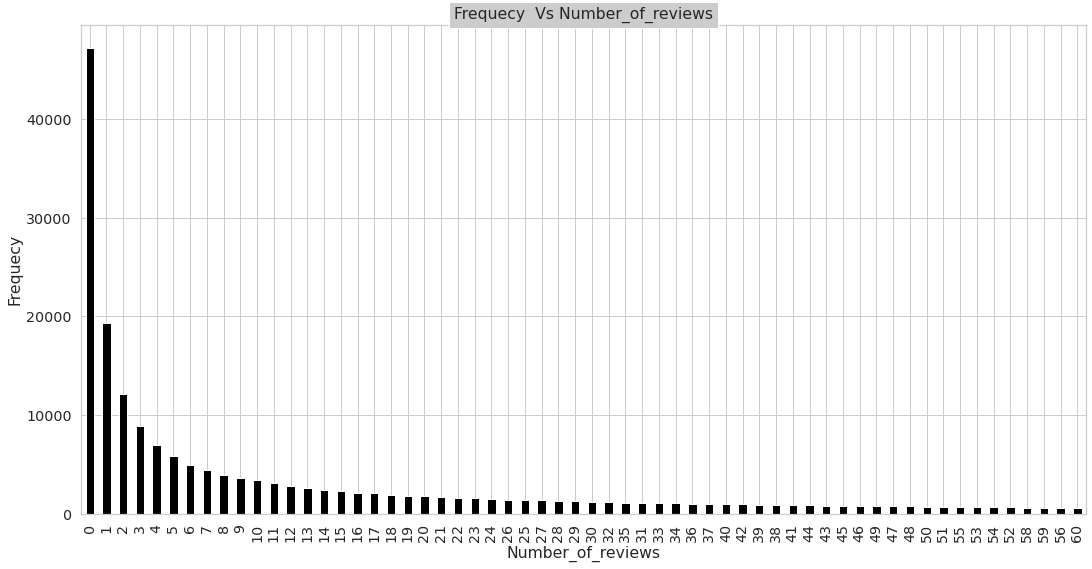

In [ ]:
#plotting number of reviews Vs frequecny
plt.figure(figsize=(18,9))
house_bnd_notnull.number_of_reviews.value_counts().sort_values(ascending=False)[:60].plot(kind='bar',color='Black')
plt.xlabel('Number_of_reviews')
plt.ylabel('Frequecy')
plt.title("Frequecy  Vs Number_of_reviews",bbox={'facecolor':'0.8', 'pad':5})

**5.5 Maximum Reviews Received on which Day of Week**

In [ ]:
#converting last_review in the days of week 
#day_of_week will reprsent days from sunday to saturday
import datetime as dt
house_bnd_notnull['day_of_week'] = house_bnd_notnull['last_review'].dt.day_name()

In [ ]:
#seeing the columns 
house_bnd_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223164 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              223164 non-null  int64         
 1   name                            223164 non-null  object        
 2   host_id                         223164 non-null  int64         
 3   host_name                       223164 non-null  object        
 4   neighbourhood                   223164 non-null  object        
 5   latitude                        223164 non-null  float64       
 6   longitude                       223164 non-null  float64       
 7   room_type                       223164 non-null  object        
 8   price                           223164 non-null  int64         
 9   minimum_nights                  223164 non-null  int64         
 10  number_of_reviews               223164 non-null  int64  

In [ ]:
#count of number_of_reviews 
house_bnd_notnull['number_of_reviews'].sort_values(ascending=False)[:20]

23        966
104620    953
2501      951
166117    950
44041     910
206144    840
218761    830
2550      827
74403     827
194440    821
2456      818
205649    801
166412    796
82        791
102       790
104623    778
166655    767
104624    754
170650    751
80        748
Name: number_of_reviews, dtype: int64

In [ ]:
#to know the day of week along with number of reviews
house_bnd_notnull[['number_of_reviews','day_of_week']].sort_values(ascending=False,by='number_of_reviews')[:100]

,number_of_reviews,day_of_week
23,966,Sunday
104620,953,Sunday
2501,951,Saturday
166117,950,Saturday
44041,910,Saturday
...,...,...
181846,607,Monday
76523,603,Sunday
195366,602,Thursday
204221,602,Friday


**One thing to note is that most of review we get is on Sunday or Saturday which clearly shows people travel more on weekends**

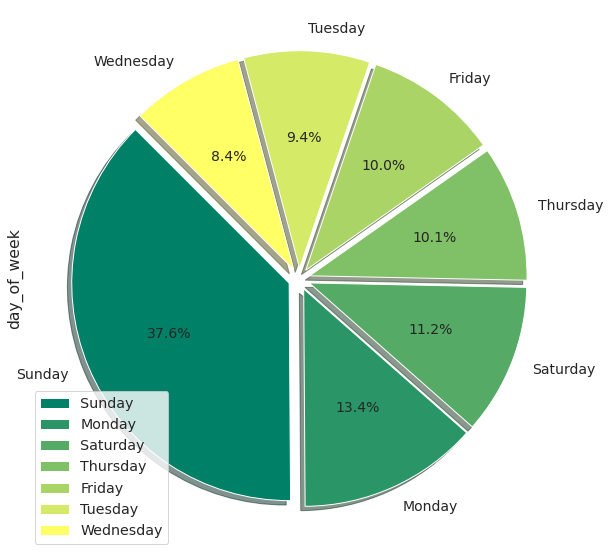

In [ ]:
#pei plot showing percenatge of days of week which people book airbnd
house_bnd_notnull['day_of_week'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

In [ ]:
#count of day of week
house_bnd_notnull['day_of_week'].value_counts()

Sunday       83914
Monday       29874
Saturday     24968
Thursday     22517
Friday       22332
Tuesday      20909
Wednesday    18650
Name: day_of_week, dtype: int64

**We can say that the BNB are mostly booked on Sunday** 

In [ ]:
#last_review recieved on which date which is maximum
house_bnd_notnull.loc[house_bnd_notnull['last_review'].value_counts()[:5]]['day_of_week']



50075       Sunday
2060        Sunday
1976        Sunday
1920     Wednesday
1805        Sunday
Name: day_of_week, dtype: object

Therefore it shows that last review was **mostly on sunday** which means that for 
**sunday most of the airBNB are booked**

---



In [ ]:
#last review recieved
house_bnd_notnull.loc[house_bnd_notnull['last_review']== '2020-03-15']['day_of_week']

11        Sunday
38        Sunday
45        Sunday
78        Sunday
179       Sunday
           ...  
226025    Sunday
226026    Sunday
226027    Sunday
226028    Sunday
226029    Sunday
Name: day_of_week, Length: 50075, dtype: object

Text(0.5, 1.0, 'Frequecy  Vs Last_review')

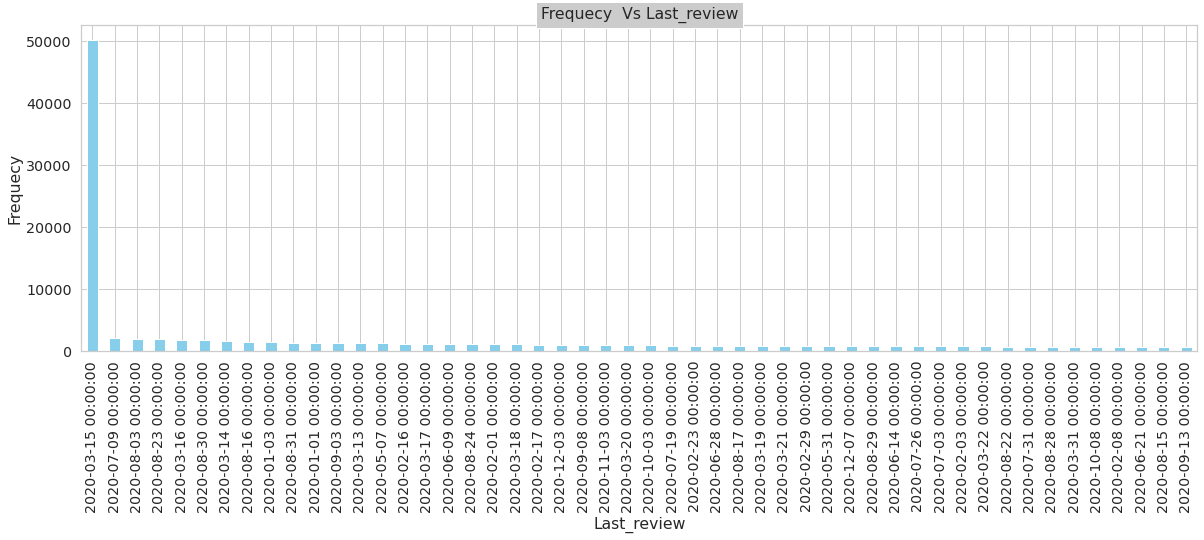

In [ ]:
#last_review Vs Frequecy
plt.figure(figsize = (20, 6))
house_bnd_notnull['last_review'].value_counts()[:50].plot(kind='bar', color='Skyblue')
plt.xlabel('Last_review')
plt.ylabel('Frequecy')
plt.title("Frequecy  Vs Last_review",bbox={'facecolor':'0.8', 'pad':5})


In [ ]:
#reviews per month frequeny
house_bnd_notnull.reviews_per_month.value_counts().sort_values(ascending=False)[:10]

1.4315    47179
0.03       2795
0.02       2742
0.08       2502
0.04       2460
0.06       2390
0.05       2325
0.07       2250
0.12       2248
1.0        2160
Name: reviews_per_month, dtype: int64

Text(0.5, 1.0, 'Frequecy  Vs Reviews_per_month')

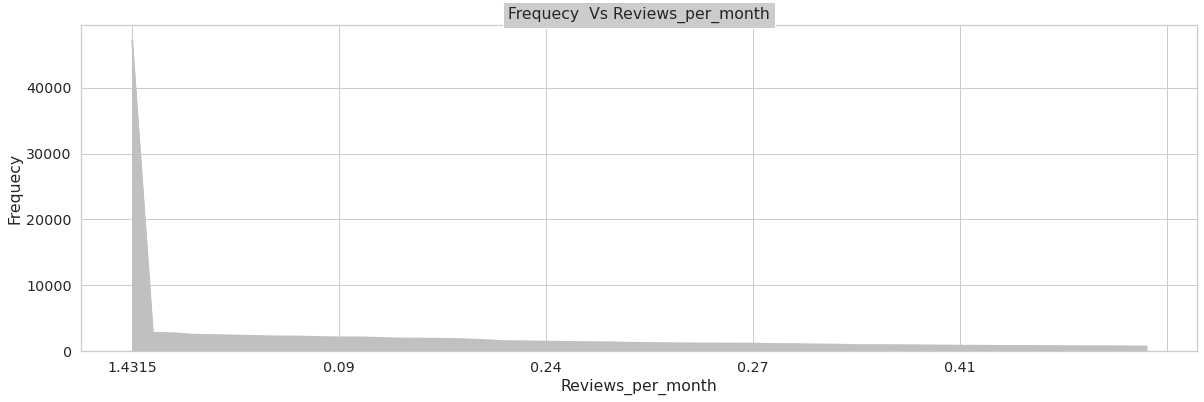

In [ ]:
#plotting graph with reviews_per_month Vs frequecny
plt.figure(figsize = (20, 6))
house_bnd_notnull['reviews_per_month'].value_counts()[:50].plot(kind='area', color='silver')
plt.xlabel('Reviews_per_month')
plt.ylabel('Frequecy')

plt.title("Frequecy  Vs Reviews_per_month",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#number of lisitng one host can have
house_bnd_notnull['calculated_host_listings_count'].value_counts()

1     103470
2      29601
3      14964
4       9545
5       5990
       ...  
88        88
72        72
70        70
68        68
79        45
Name: calculated_host_listings_count, Length: 142, dtype: int64

Text(0.5, 1.0, 'Frequecy  Vs Calculated_host_listings_count')

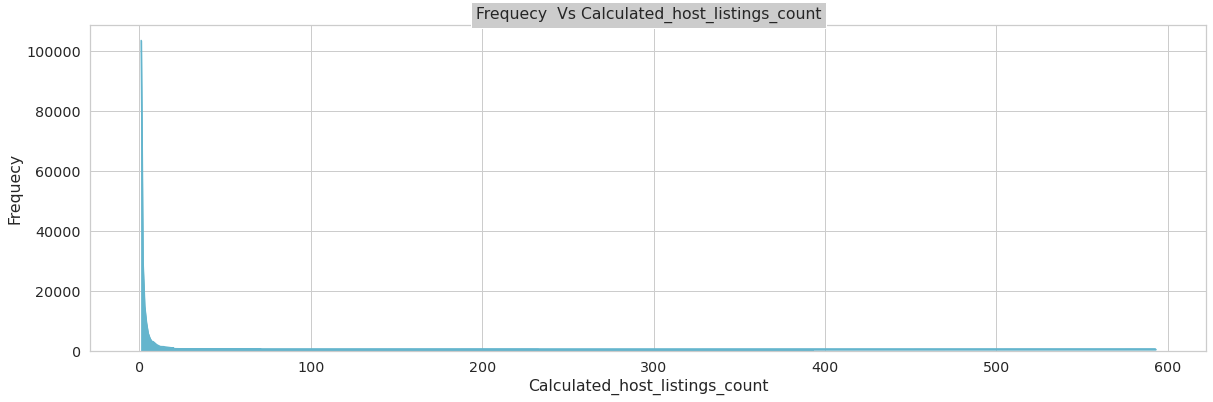

In [ ]:
#plotting number of listing a host cna have in total
plt.figure(figsize = (20, 6))
house_bnd_notnull['calculated_host_listings_count'].value_counts()[:50].plot(kind='area', color='c')
plt.xlabel('Calculated_host_listings_count')
plt.ylabel('Frequecy')

plt.title("Frequecy  Vs Calculated_host_listings_count",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#unique number of listing available 365 days
house_bnd_notnull.loc[house_bnd_notnull['availability_365']==365].shape[0]

12398

In [ ]:
#count of listing available according to number of days
house_bnd_notnull.availability_365.value_counts().sort_values(ascending=False)[:10]

0      56773
365    12398
364     4952
89      4032
179     3566
90      2906
180     2393
363     2357
360     1819
88      1698
Name: availability_365, dtype: int64

Text(0.5, 1.0, 'Frequecy  Vs Availability_365')

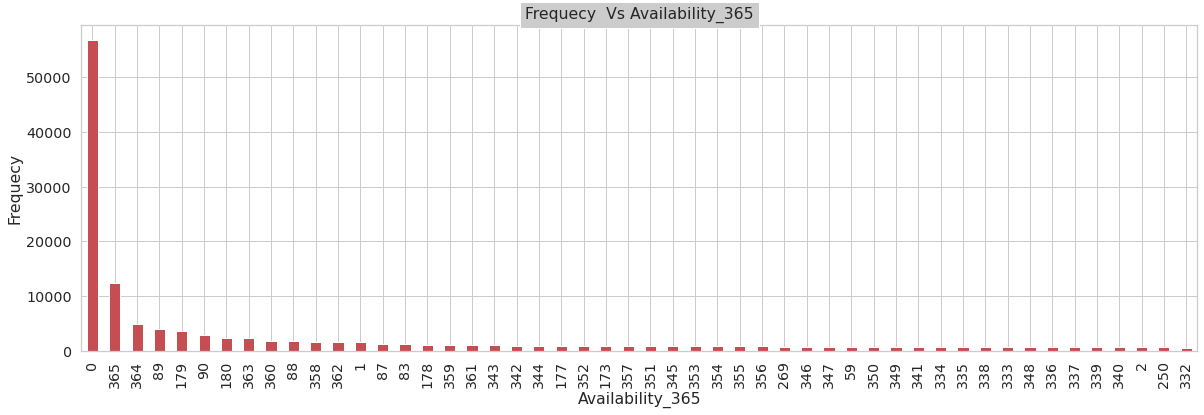

In [ ]:
#plotting availabiliting Vs cpunt
plt.figure(figsize = (20, 6))
house_bnd_notnull['availability_365'].value_counts()[:50].plot(kind='bar', color='r')
plt.xlabel('Availability_365')
plt.ylabel('Frequecy')

plt.title("Frequecy  Vs Availability_365",bbox={'facecolor':'0.8', 'pad':5})

**5.6 Top 10 Cities having listing**

In [ ]:
#unique cities having listing 
house_bnd_notnull['city'].nunique()

28

Text(0.5, 1.0, 'Frequecy  Vs City')

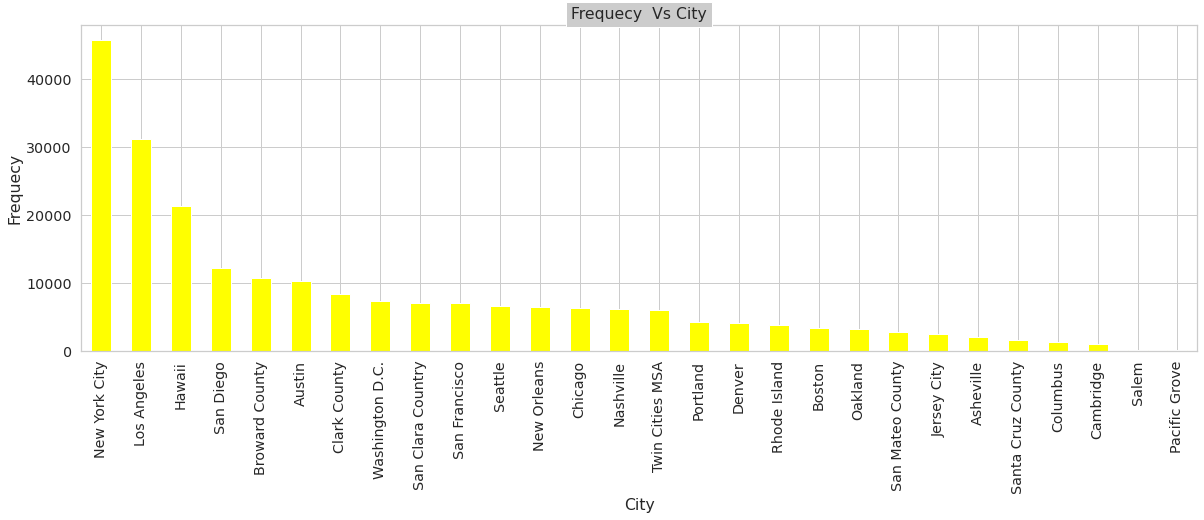

In [ ]:
#plotting city Vs count on bar graph
plt.figure(figsize = (20, 6))
house_bnd_notnull['city'].value_counts()[:50].plot(kind='bar', color='Yellow')

plt.xlabel('City')
plt.ylabel('Frequecy')

plt.title("Frequecy  Vs City",bbox={'facecolor':'0.8', 'pad':5})

I clearly shows that cities such as **New York ,Los angeles,Hawaii,sand deago** are prefeered choices of people opt for Airbnd

**6. Comapring Different Columns /How each one are dependent of Price column**

**6.1 Room_Type Vs Price**

Text(0.5, 1.0, 'Room_Type Vs Count')

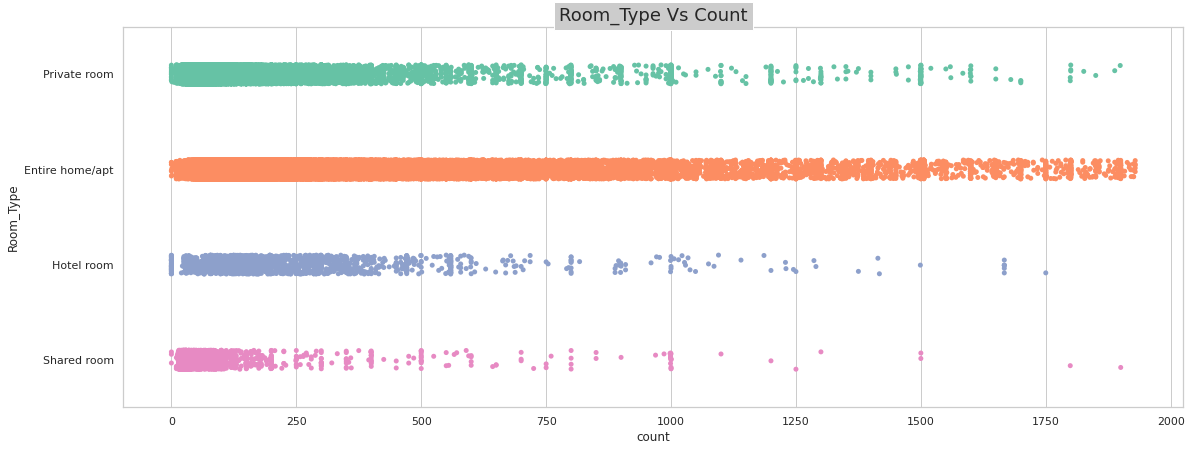

In [ ]:
#plotting price of room for different varieties of room on striplot
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(19,7))
ax=sns.stripplot(y='room_type' ,x='price',data=house_bnd_notnull,palette='Set2',color='matplotlib')
plt.xlabel("count")
plt.ylabel("Room_Type")
plt.title("Room_Type Vs Count",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#listing available with price gretaer then 1750
house_bnd_notnull.loc[house_bnd_notnull['price']>1750]['room_type'].value_counts()

Entire home/apt    227
Private room         9
Shared room          2
Name: room_type, dtype: int64

These shows that we dont have **hotel room** above the **range of 1750**

Text(0.5, 1.0, 'Room_Type Vs Count')

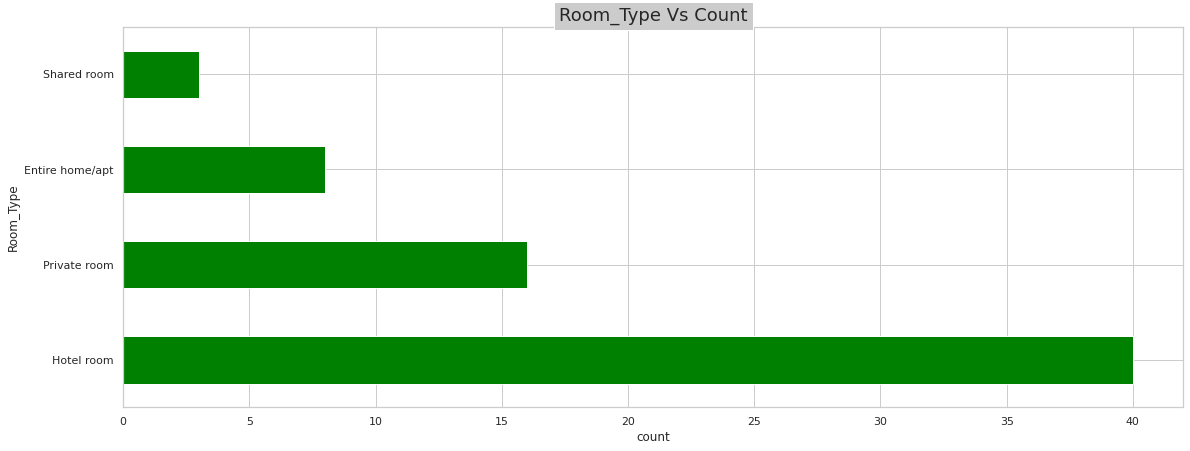

In [ ]:
#count of listing available with price less then 1 or equal to and also plotting on bar graph
plt.figure(figsize=(19,7))
house_bnd_notnull.loc[house_bnd_notnull['price']<=1]['room_type'].value_counts().plot(kind='barh',color='green')
plt.xlabel("count")
plt.ylabel("Room_Type")
plt.title("Room_Type Vs Count",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})



**On analyzing we founf that neighbourhood columns has some pure integeres so we have to replace them by median**

In [ ]:
#will check for column neighbourhood as it has some integer values
house_bnd_notnull.groupby('neighbourhood')['price'].sum().sort_values(ascending=False)[:50]

neighbourhood
Unincorporated Areas                    1619993
Lahaina                                 1254019
Hennepin                                1130952
Kihei-Makena                             967709
Hollywood                                795983
Primary Urban Center                     666528
Mission Bay                              605098
Fort Lauderdale                          562328
Midtown                                  508631
78704                                    479518
North Kona                               461144
Williamsburg                             446433
East Village                             407885
Koloa-Poipu                              407291
North Shore Kauai                        401071
San Jose                                 373354
Venice                                   366943
Bedford-Stuyvesant                       353963
78702                                    341874
Hell's Kitchen                           337238
Upper West Side           



*   It has some integer values in it so will try to replace by the median




In [ ]:
#we observe some integer values in neighbourhood colum while plotting so will try to replace with median
house_bnd_notnull['neighbourhood'] = house_bnd_notnull['neighbourhood'].replace(['78741','78701','78702','78703','28801','28803','28806','28804'],'Unincorporated Areas')

In [ ]:
#replacing values like 78701,78741 ,78701,78702,78703,78704 ,28801,28803,28806,28804 with median
house_bnd_notnull.loc[(house_bnd_notnull['neighbourhood']=='78741') |  (house_bnd_notnull['neighbourhood']=='78701') | (house_bnd_notnull['neighbourhood']=='78702') | (house_bnd_notnull['neighbourhood']=='78703')|(house_bnd_notnull['neighbourhood']=='78703')  | (house_bnd_notnull['neighbourhood']=='28801') |  (house_bnd_notnull['neighbourhood']=='28804')].shape

(0, 17)

In [ ]:
#checking dataframe
house_bnd_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223164 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              223164 non-null  int64         
 1   name                            223164 non-null  object        
 2   host_id                         223164 non-null  int64         
 3   host_name                       223164 non-null  object        
 4   neighbourhood                   223164 non-null  object        
 5   latitude                        223164 non-null  float64       
 6   longitude                       223164 non-null  float64       
 7   room_type                       223164 non-null  object        
 8   price                           223164 non-null  int64         
 9   minimum_nights                  223164 non-null  int64         
 10  number_of_reviews               223164 non-null  int64  

**6.2 City Vs Price**

Text(0.5, 1.0, 'Price Vs City')

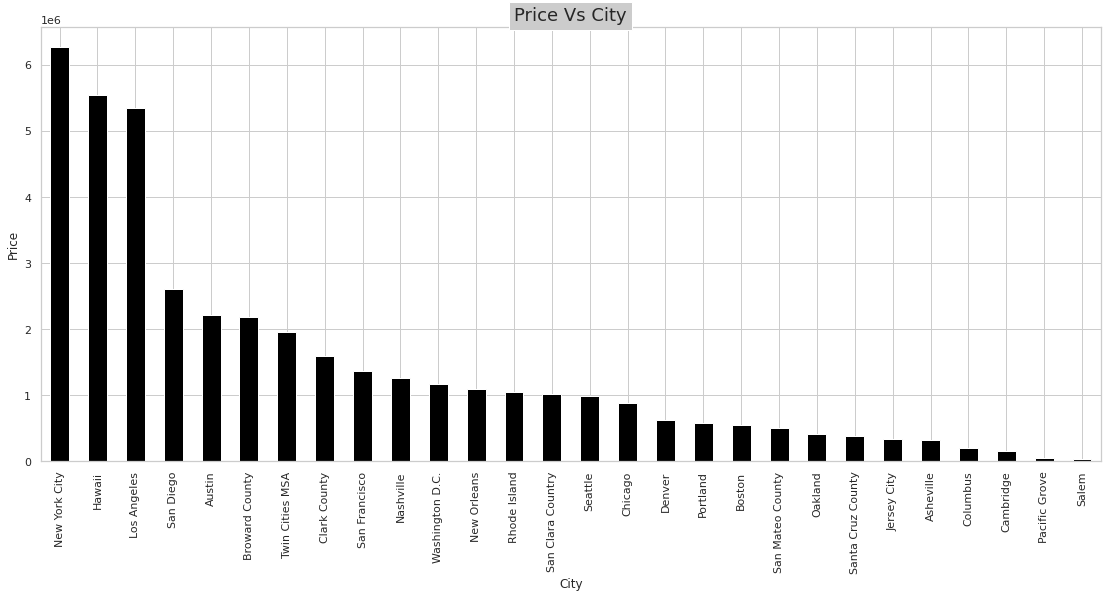

In [ ]:
#plot bar graph between city and price
plt.figure(figsize=(19,8))
house_bnd_notnull.groupby('city')['price'].sum().sort_values(ascending=False).plot(kind='bar',color='Black')
plt.xlabel("City")
plt.ylabel("Price")
plt.title("Price Vs City",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#count of city with price in ascending order with new york has hoghest
house_bnd_notnull.groupby('city')['price'].sum().sort_values(ascending=False)

city
New York City        6263379
Hawaii               5538187
Los Angeles          5340110
San Diego            2610793
Austin               2211515
Broward County       2190180
Twin Cities MSA      1950034
Clark County         1591154
San Francisco        1366742
Nashville            1259892
Washington D.C.      1177993
New Orleans          1097049
Rhode Island         1051434
San Clara Country    1016932
Seattle               996163
Chicago               878110
Denver                619517
Portland              576998
Boston                549913
San Mateo County      509212
Oakland               411271
Santa Cruz County     389931
Jersey City           336955
Asheville             322833
Columbus              197302
Cambridge             163052
Pacific Grove          44949
Salem                  41641
Name: price, dtype: int64

**6.3 Minimum_Nights vs Price**

Text(0.5, 1.0, 'Price Vs Minimum_Nights')

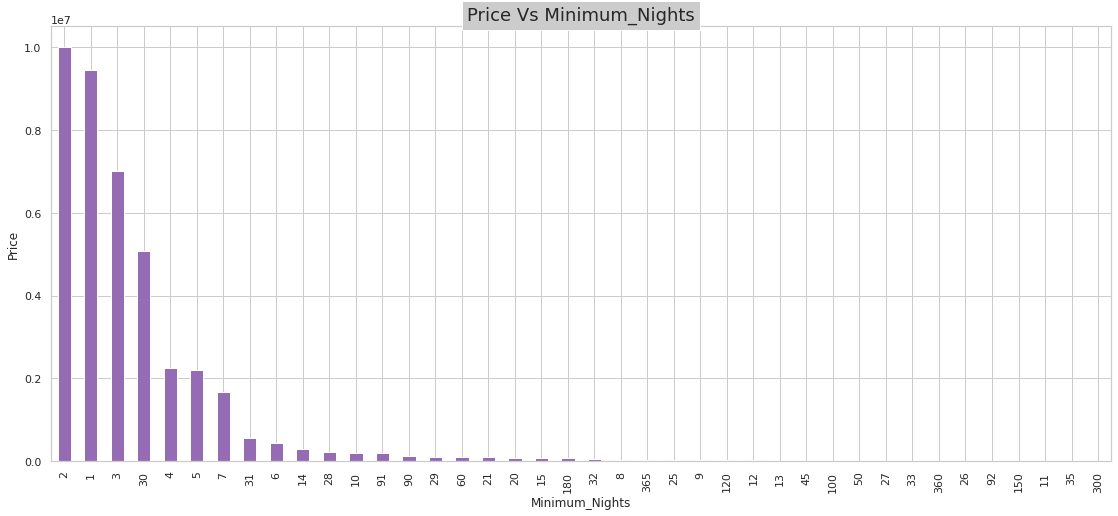

In [ ]:
#plotting minimum_nights Vs proce
plt.figure(figsize=(19,8))
house_bnd_notnull.groupby('minimum_nights')['price'].sum().sort_values(ascending=False)[:40].plot(kind='bar',color='m')
plt.xlabel("Minimum_Nights")
plt.ylabel("Price")
plt.title("Price Vs Minimum_Nights",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#count of minimum nights to be booked
house_bnd_notnull.groupby('minimum_nights')['price'].count().sort_values(ascending=False)



minimum_nights
1      59504
2      54278
30     33304
3      30328
4       9365
       ...  
198        1
209        1
213        1
222        1
104        1
Name: price, Length: 169, dtype: int64

In [ ]:
#count of maximum nights one has booked
house_bnd_notnull.groupby('minimum_nights')['price'].sum().sort_values(ascending=True)

minimum_nights
271         19
96          27
94          40
352         40
114         40
        ...   
4      2243898
30     5086592
3      7005985
1      9436648
2      9997346
Name: price, Length: 169, dtype: int64

In [ ]:
#price of lsiting booked for less then 10 nights 
print("the number of listing with less then 10 miminum nights have price as under")
print("----------------------------------")
house_bnd_notnull.loc[house_bnd_notnull['minimum_nights']<=10]['price'].sort_values(ascending=False)

the number of listing with less then 10 miminum nights have price as under
----------------------------------


39951     1929
4236      1929
221798    1929
39350     1929
60685     1929
          ... 
100310       0
157909       0
157910       0
157971       0
99980        0
Name: price, Length: 173646, dtype: int64

In [ ]:
#price of lsiting booked for nights between 10 to 300
print("the number of listing with mimimum nights between 10 to 300 have price as under")
print("----------------------------------")
house_bnd_notnull.loc[(house_bnd_notnull['minimum_nights']>10) & (house_bnd_notnull['minimum_nights']<300)]['price'].sort_values(ascending=False)

the number of listing with mimimum nights between 10 to 300 have price as under
----------------------------------


48921     1925
7820      1900
76505     1900
90030     1900
17551     1900
          ... 
105469       1
99461        0
208180       0
208276       0
99925        0
Name: price, Length: 49175, dtype: int64

In [ ]:
#price of lsiting booked for gretaer then 300 nights 
print("the number of listing with greater then 300 miminum nights have price as under")
print("----------------------------------")
house_bnd_notnull.loc[house_bnd_notnull['minimum_nights']>=300]['price'].sort_values(ascending=False)

the number of listing with greater then 300 miminum nights have price as under
----------------------------------


177044    1800
149738    1451
156014    1275
94279     1200
95774     1018
          ... 
188503      29
212579      28
143971      26
32207       25
37339       22
Name: price, Length: 343, dtype: int64



1.   These shown that people prefer to book listings **less then 10 minimum nights** and price is also **higher** in that case as **compared to 365 night**




**6.4 Name Vs Price**

In [ ]:
#name with the price 
house_bnd_notnull.groupby('name')['price'].sum().sort_values(ascending=False)[:40]

name
Home away from home                                             13860
A place of your own | 2BR in Las Vegas                           9475
Cozy place to call home | 1BR in Los Angeles                     8972
Cozy place to call home | 2BR in Los Angeles                     8773
Luxury High-Rise 2BR in Los Angeles                              7932
OCEAN VIEW IN TIDES CONDO 1B/1B                                  7500
Well-equipped apartment home | 1BR in Boston                     6918
Stay in a place of your own | 1BR in Washington                  6462
NEW LISTING! Private Ocean Luxury Condos at Beachwalk Resort     6461
Marriott's Ko Olina Beach Club                                   5936
Discounted Fisherman's Wharf Hotel                               5399
TRIBE ‚ù§Ô∏è Deep Cleaned  2BR @ Great Mall Milpitas             5319
OCEAN VIEW IN TIDES CONDO 2BED/1.5BATH                           4800
Marriott Vacation Club Pulse w/ City Views BR                    4497
Stretch out. Wo

In [ ]:
#total listing having 0 as price
house_bnd_notnull.loc[house_bnd_notnull['price']==0].sort_values(ascending=True,by='price')['name']


11106                  Hotel Granduca Austin
158633                        The Leon Hotel
158741                         Hotel Shocard
158742                          The Benjamin
158815                            The Surrey
                         ...                
157971                      Lyric At 70 Pine
158362                          Hotel Five44
158363            Cassa Hotel NY 45th Street
100310            Colony Inn North Hollywood
225353    Dupont Circle Embassy Inn by FOUND
Name: name, Length: 62, dtype: object

In [ ]:
#total listing having  price less then equal to 10 is
house_bnd_notnull.loc[house_bnd_notnull['price']<=10].sort_values(ascending=True,by='price')['name']

158741                                        Hotel Shocard
158818                                          Doxie Hotel
158815                                           The Surrey
158742                                         The Benjamin
158633                                       The Leon Hotel
                                ...                        
22090                                        Just Like Home
164353                                     Backyard Camping
25983                                              THE Loft
173363     FULL BED in College Hill/ Brown ‚òÖ MICHIE HOUSE
173368    ‚≠êÔ∏èVictoriano Room‚≠êÔ∏èCollege Hill ‚≠êÔ∏è...
Name: name, Length: 146, dtype: object

In [ ]:
#total listing having price greater then 1900 are
house_bnd_notnull.loc[house_bnd_notnull['price']>=1900].sort_values(ascending=False,by='price')['name']

221798            PRIME LOCATION . HEART OF THE CITY!  U st
39350         Spacious Luxury with Indoor and Outdoor Pools
60685     Prime Oceanfront 3Bd/3Ba Condo - Wailea Elua #...
4236                            Modern Central East/DT Home
39951                    Exquisite 5 star VIP Vegas Mansion
42235     Hawaiian Oasis 9Bd 8Ba Comfy Home w/ Pool & Falls
48921     Beautiful Waterfront Property, Pool & Ocean Ma...
221158             Historic Rowhouse in Logan/Dupont Circle
38887                  Entire Compound  -Building Sleeps 28
31586                                Rock and Roll Paradise
54874                                     Kahala Alii (5bd)
103795    The Perfect Jetliner View Villa with the perfe...
96230     Sunset Heights - Amazing view, Infinity edge p...
78218                   Beverly Hills Estate Pool Tennis Ct
42120      $6Million Ultra Luxury Palms Penthouse + JACUZZI
114251                                      Decadent Maison
56152                                 Wa



*   We have total of **62 Listing with price as 0**
*   146 with price less then equal to 10
*   43 have price more then 1900





Text(0.5, 1.0, 'Price Vs Name')

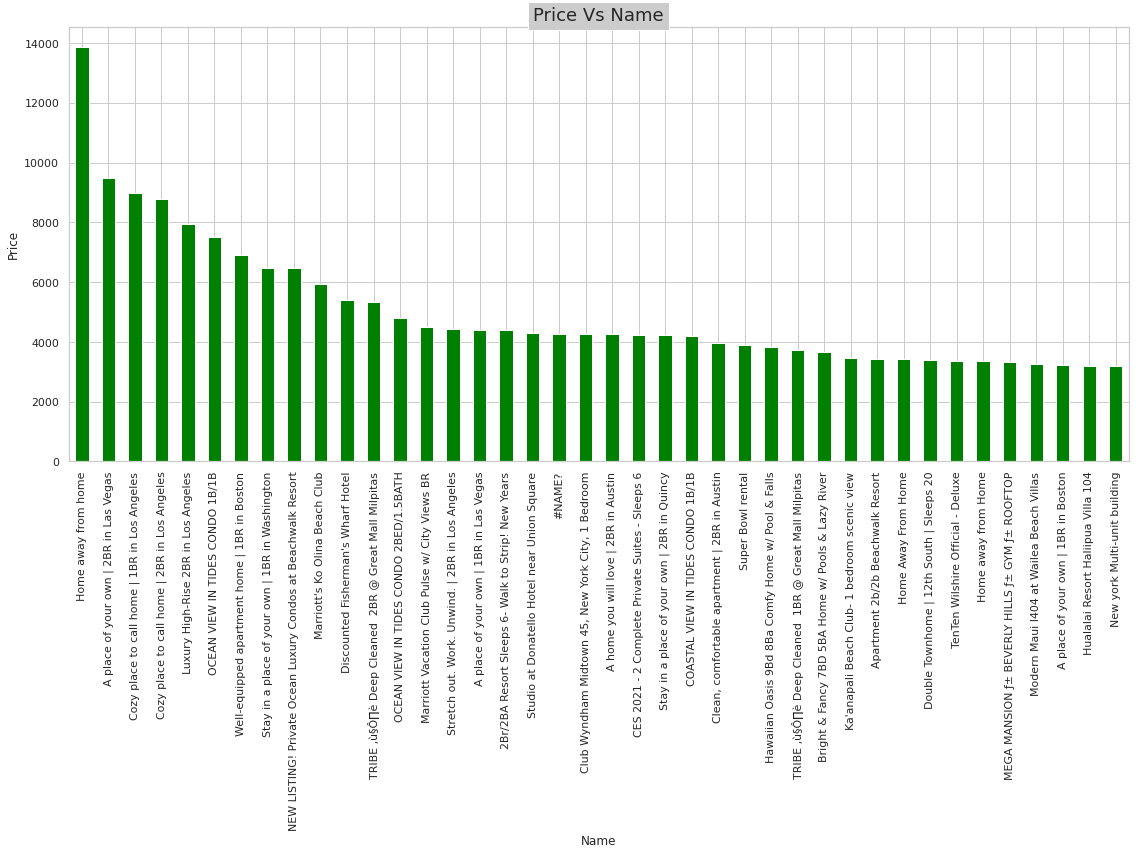

In [ ]:
#plotting bar graph between price and name
plt.figure(figsize=(19,8))
house_bnd_notnull.groupby('name')['price'].sum().sort_values(ascending=False)[:40].plot(kind='bar',color='green')
plt.xlabel("Name")
plt.ylabel("Price")
plt.title("Price Vs Name",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**6.5 Host_Name Vs Price**

Text(0.5, 1.0, 'Price Vs host_name')

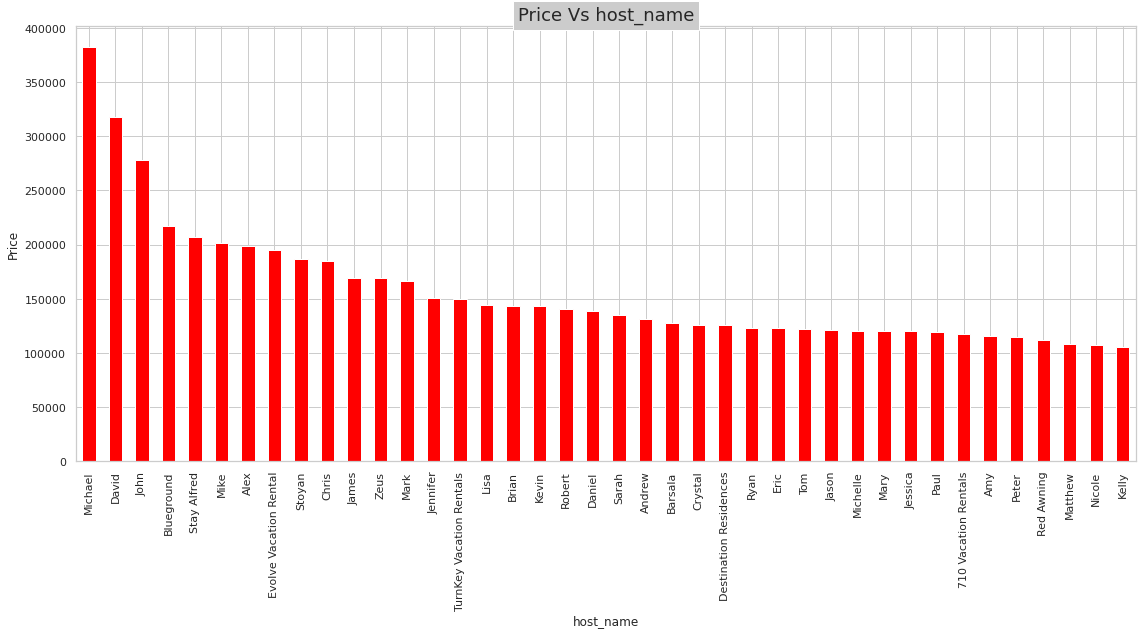

In [ ]:
#plotting graph between host_name and price
plt.figure(figsize=(19,8))
house_bnd_notnull.groupby('host_name')['price'].sum().sort_values(ascending=False)[:40].plot(kind='bar',color='red')
plt.xlabel("host_name")
plt.ylabel("Price")
plt.title("Price Vs host_name",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#count of host_name Vs price
house_bnd_notnull.groupby('host_name')['price'].sum().sort_values(ascending=False)[:40]

host_name
Michael                     382270
David                       317827
John                        278042
Blueground                  217082
Stay Alfred                 206995
Mike                        201476
Alex                        198595
Evolve Vacation Rental      194834
Stoyan                      186744
Chris                       184736
James                       169497
Zeus                        168877
Mark                        166473
Jennifer                    150890
TurnKey Vacation Rentals    149917
Lisa                        144006
Brian                       143388
Kevin                       143228
Robert                      140223
Daniel                      138955
Sarah                       134914
Andrew                      131327
Barsala                     127771
Crystal                     126148
Destination Residences      126137
Ryan                        123389
Eric                        122924
Tom                         122141
Jason     

**6.6 availabaility_365 Vs price**

Text(0.5, 1.0, 'Price Vs availability_365')

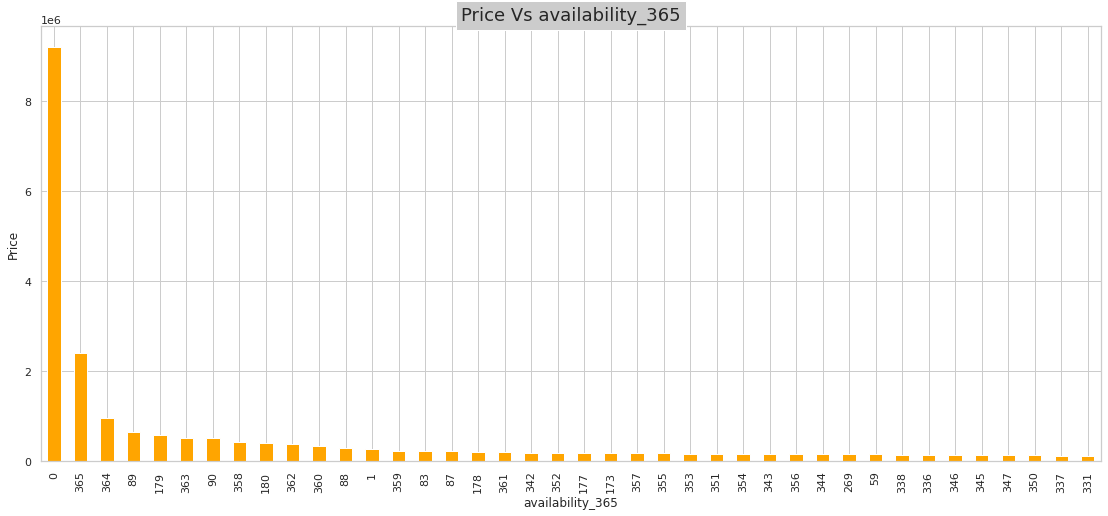

In [ ]:
#plotting graph between avaialibility vs price
plt.figure(figsize=(19,8))
house_bnd_notnull.groupby('availability_365')['price'].sum().sort_values(ascending=False)[:40].plot(kind='bar',color='orange')
plt.xlabel("availability_365")
plt.ylabel("Price")
plt.title("Price Vs availability_365",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#count of price with avaiability
house_bnd_notnull.groupby('availability_365')['price'].count().sort_values(ascending=False)[:40]

availability_365
0      56773
365    12398
364     4952
89      4032
179     3566
90      2906
180     2393
363     2357
360     1819
88      1698
358     1669
362     1657
1       1577
87      1169
83      1161
178     1098
359     1093
361     1032
343      964
342      953
344      917
177      914
352      910
173      867
357      845
351      827
345      821
354      809
353      809
355      802
356      782
269      769
346      749
347      699
59       692
350      683
349      664
341      658
334      647
335      644
Name: price, dtype: int64

In [ ]:
#count of lisitng which is 0 days avaialble with reviews 
house_bnd_notnull.loc[house_bnd_notnull['availability_365']==0].sort_values(by='last_review',ascending=False)[['number_of_reviews','reviews_per_month','last_review']]

,number_of_reviews,reviews_per_month,last_review
1696,28,2.68,2020-12-09
684,241,6.83,2020-12-09
102,790,10.37,2020-12-09
29115,163,3.58,2020-12-09
1280,105,5.71,2020-12-09
...,...,...,...
2231,1,0.01,2012-03-15
2170,1,0.01,2012-03-13
117812,1,0.01,2012-02-10
117650,1,0.01,2012-02-01


In [ ]:
#count of reviews  when availbility equal to 365
house_bnd_notnull.loc[house_bnd_notnull['availability_365']==365].sort_values(by='last_review',ascending=False)[['number_of_reviews','reviews_per_month','last_review']]

,number_of_reviews,reviews_per_month,last_review
161578,6,3.53,2020-12-08
222653,35,1.23,2020-12-08
40829,2,0.3,2020-12-08
15078,4,0.53,2020-12-08
15120,4,1.04,2020-12-08
...,...,...,...
194233,2,0.02,2011-09-30
117343,2,0.02,2011-08-29
194216,1,0.01,2011-05-23
73182,1,0.01,2011-05-21


Text(0.5, 1.0, 'Price Vs calculated_host_listings_count')

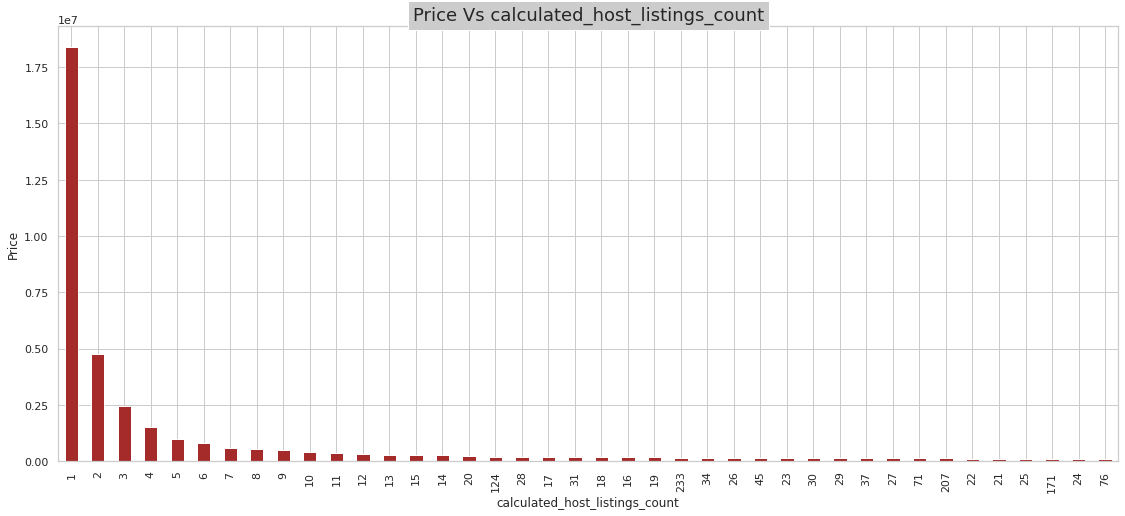

In [ ]:
#total lisitn with price
plt.figure(figsize=(19,8))
house_bnd_notnull.groupby('calculated_host_listings_count')['price'].sum().sort_values(ascending=False)[:40].plot(kind='bar',color='brown')
plt.xlabel("calculated_host_listings_count")
plt.ylabel("Price")
plt.title("Price Vs calculated_host_listings_count",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**6.7 reviews Vs price**

Text(0.5, 1.0, 'last_review Vs price')

<Figure size 1368x576 with 0 Axes>

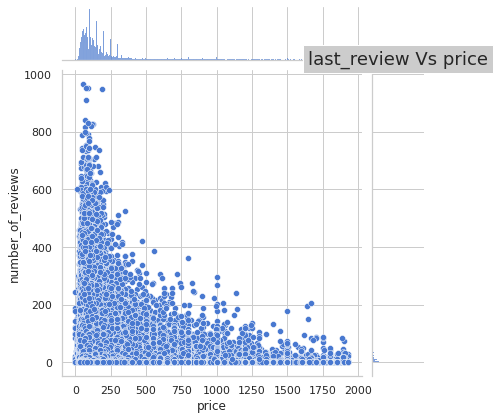

In [ ]:
plt.figure(figsize=(19,8))
sns.jointplot(x='price',y='last_review',data=house_bnd_notnull)
plt.xlabel("price")
plt.ylabel("last_review")
plt.title("last_review Vs price",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})


Text(0.5, 1.0, 'number_of_reviews Vs price')

<Figure size 1368x576 with 0 Axes>

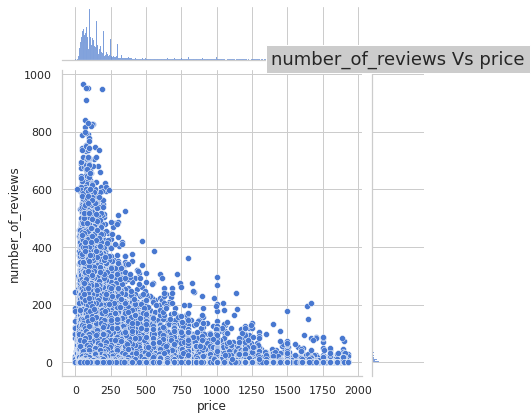

In [ ]:
plt.figure(figsize=(19,8))
sns.jointplot(x='price',y='number_of_reviews',data=house_bnd_notnull)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.title("number_of_reviews Vs price",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
#import plotly.express as ex
#!pip install chart-studio
!pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


**7. Plotting Geo Graphs**

In [ ]:
#will try to form cities in the form of geo plot
states_dic = {'Asheville':'NC','Austin':'TX','Boston':'MA','Broward County':'FL','Cambridge':'MA','Chicago':'IL','Clark County':'NV','Columbus':'OH','Denver':'CO','Hawaii':'HI','Jersey City':'NJ',
             'Los Angeles':'SC','Nashville':'TN','New Orleans':'MS','New York City':'NY','Oakland':'CA','Pacific Grove':'CA','Portland':'OR','Rhode Island':'RI','Salem':'MA','San Clara Country':'CA',
             'Santa Cruz County':'CA','San Diego':'CA','San Francisco':'CA','San Mateo County':'CA','Seattle':'WA','Twin Cities MSA':'MN','Washington D.C.':'DC'}

house_bnd_notnull['state'] = house_bnd_notnull['city'].apply(lambda x : states_dic[x])


**7.1 Number Of Listings By State** 

In [ ]:
#number of lisiting in state wise
counts = house_bnd_notnull['state'].value_counts()
fig = ex.choropleth(locations=counts.index,color=counts.values, locationmode="USA-states", scope="usa",title='Number Of Listings By State ', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()


**7.2 Average Listing Price At Each State on Geo graph**

In [ ]:
#naverage price of lisitng and in whuch city 
g_data = house_bnd_notnull.groupby(by='state').mean()
#g_dat = g_dat.reset_index()
fig = ex.choropleth(g_data,locations=g_data.index,color='price', locationmode="USA-states", scope="usa",title='Average Listing Price At Each State', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()

**7.3 Average Listing Number Of Reviews At Each State**

In [ ]:
#average number of revirews state wise
g_dat = house_bnd_notnull.groupby(by='state').mean()
fig = ex.choropleth(g_dat,locations=g_dat.index,color='number_of_reviews', locationmode="USA-states", scope="usa",title='Average Listing Number Of Reviews At Each State', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()

**7.4 Average Listing Availability At Each State**

In [ ]:
#average lsiitn availabe in state
g_dat = house_bnd_notnull.groupby(by='state').mean()
fig = ex.choropleth(g_dat,locations=g_dat.index,color='availability_365', locationmode="USA-states", scope="usa",title='Average Listing Availability At Each State', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()

**MultiVariavte Analysis**

**Heat Map**

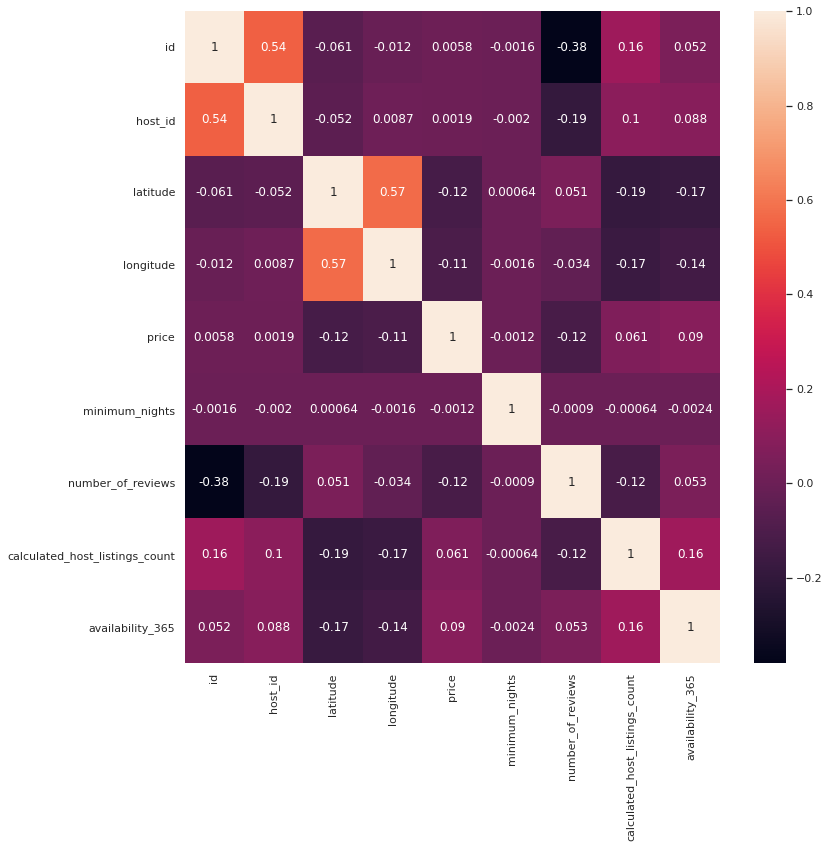

In [ ]:
#plotting heat map
plt.figure(figsize=(12,12))
sns.heatmap(house_bnd_notnull.corr(),annot=True)

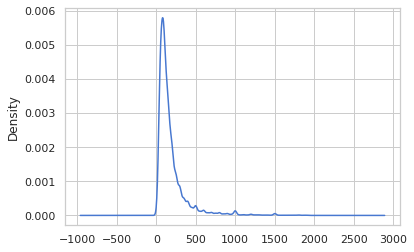

In [ ]:
#will check if price is normally ditributed or not
house_bnd_notnull['price'].plot(kind='kde')

In [ ]:
house_bnd_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223164 entries, 0 to 226029
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              223164 non-null  int64         
 1   name                            223164 non-null  object        
 2   host_id                         223164 non-null  int64         
 3   host_name                       223164 non-null  object        
 4   neighbourhood                   223164 non-null  object        
 5   latitude                        223164 non-null  float64       
 6   longitude                       223164 non-null  float64       
 7   room_type                       223164 non-null  object        
 8   price                           223164 non-null  int64         
 9   minimum_nights                  223164 non-null  int64         
 10  number_of_reviews               223164 non-null  int64  

**9.Conclusions**


1.   We have **5** Listing which has **Highest Price** as **1930** and we have **some Listing with price as 0** too .And the maximum Price which has highest **frequecy is 100** [Section5.4]
2.   We have momst of the Listing where room type is as **Entire Home/Apt and 1897 listing as Hotel Room**[Section 5.1]
3.   Most of the **Reviews** we have **got is on Sunday** and we can also say that people mostly Travel on weekends[Section 5.5]
4.   **New York** is the city with **Highest Price** of Listng and **Salem** as **lowest listing** [Section 6.2]
5.   We have **56773** Listing which a**re not available for even a 0 da**y followed by Listing which are available for 365 Days and same is the Price Highest for Listings which are available for 0 day[Section 6.6]
6.   We have **0 Listing** available which is availble whole year[Section6.6]
7.   Most of the host has **1 Listing** as their property **folowed by 2** [Section 5.5]
8.   **Price** booked for minimum nights **equal to 0** have highest price as compared to other[Section 6.3]
9.   Number Of Listings which is **Highest** in state are **New York,California followed by south California**[Section7.1]
10. **Average Listing Price** is Highest in city **Twin Cities MSA** followed by **Hawaii**[Section 7.2]
11.  **Average Listing Number** Of **Reviews** is highest in **Portland** city followed by **Asheville**[Section 7.3]
12.  Average Listing Availability  is highest in state as **Hawaii** followed by **Broward County state**[Section 7.4]






**Actionable Insights**

1.   We can increase price by providing some additional facilites may be in the form of some discount coupons and some refreshement .
2.   The one which are higly priced should provide some pick up facilites from same city or from same city airport to get more reviews .
3.  They should reward their customer which small gift yearly which will encourage them to come to thir listing more.



**Machine Learning**





In [ ]:
#copying data set to new
house_bnb_col_drop=house_bnd_notnull.copy()


In [ ]:
#info of dataset columns
house_bnb_col_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223164 entries, 0 to 226029
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              223164 non-null  int64         
 1   name                            223164 non-null  object        
 2   host_id                         223164 non-null  int64         
 3   host_name                       223164 non-null  object        
 4   neighbourhood                   223164 non-null  object        
 5   latitude                        223164 non-null  float64       
 6   longitude                       223164 non-null  float64       
 7   room_type                       223164 non-null  object        
 8   price                           223164 non-null  int64         
 9   minimum_nights                  223164 non-null  int64         
 10  number_of_reviews               223164 non-null  int64  

In [ ]:
#head 
house_bnb_col_drop.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,day_of_week,state
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,Unincorporated Areas,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville,Sunday,NC
1,80905,French Chic Loft,427027,Celeste,Unincorporated Areas,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville,Thursday,NC


In [ ]:
#converting review_per_month inot float tthen to int
house_bnb_col_drop.reviews_per_month = house_bnb_col_drop.reviews_per_month.astype(float)
house_bnb_col_drop.reviews_per_month=house_bnb_col_drop.reviews_per_month.astype(int)


In [ ]:
#converting columns as object to category for faster conversion
house_bnb_col_drop.name=house_bnd_notnull.name.astype('category')
house_bnb_col_drop.host_name=house_bnd_notnull.host_name.astype('category')
house_bnb_col_drop.neighbourhood=house_bnd_notnull.neighbourhood.astype('category')
house_bnb_col_drop.room_type=house_bnd_notnull.room_type.astype('category')
house_bnb_col_drop.last_review=house_bnd_notnull.last_review.astype('category')
house_bnb_col_drop.city=house_bnd_notnull.city.astype('category')

In [ ]:
#columns view
house_bnb_col_drop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 223164 entries, 0 to 226029
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   id                              223164 non-null  int64   
 1   name                            223164 non-null  category
 2   host_id                         223164 non-null  int64   
 3   host_name                       223164 non-null  category
 4   neighbourhood                   223164 non-null  category
 5   latitude                        223164 non-null  float64 
 6   longitude                       223164 non-null  float64 
 7   room_type                       223164 non-null  category
 8   price                           223164 non-null  int64   
 9   minimum_nights                  223164 non-null  int64   
 10  number_of_reviews               223164 non-null  int64   
 11  last_review                     223164 non-null  category
 12  re

In [ ]:
df_bnb_ml1=house_bnb_col_drop.copy()

In [ ]:
#dropping columns host_id,id,day_of_week,state,price_normal ,last _review as it will not g=have nay impact in ML algo
df_bnb_ml1.drop(columns=['host_id','id','host_name','day_of_week','state','last_review','latitude','longitude','name'],axis=1,inplace=True)

In [ ]:
#using label encoder for columns to make them sclaer
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_bnb_ml1['neighbourhood'] = label_encoder.fit_transform(df_bnb_ml1['neighbourhood'])
df_bnb_ml1['room_type'] = label_encoder.fit_transform(df_bnb_ml1['room_type'])
df_bnb_ml1['city'] = label_encoder.fit_transform(df_bnb_ml1['city'])

In [ ]:
#to see head of the dataset
df_bnb_ml1.shape

(223164, 9)

In [ ]:
#removing rows which has zscore gretaer then 3 
from scipy import stats
z_scores = stats.zscore(df_bnb_ml1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_bnb_ml1[filtered_entries]
print(len(new_df))

203993


In [ ]:
#using standard sclaer to scale on same paramter all columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(new_df)
scaled_features = scaler.fit_transform(new_df)
scaled_features_df = pd.DataFrame(scaled_features, index=new_df.index, columns=new_df.columns)

In [ ]:
#to see head of dataframe
scaled_features_df.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,1.285046,1.351542,-0.766808,-0.362753,2.567523,0.108602,-0.387742,-1.107055,-1.904219
1,1.285046,-0.700675,2.477353,-0.362753,2.007724,0.108602,0.037897,0.951807,-1.904219
2,1.285046,-0.700675,-0.648119,0.784961,1.424601,-0.807081,-0.345178,1.023295,-1.904219
4,1.285046,1.351542,-0.252490,0.784961,0.701528,-0.807081,-0.387742,-1.107055,-1.904219
5,1.285046,-0.700675,-0.181276,-0.125295,0.608228,-0.807081,-0.387742,0.994700,-1.904219


In [ ]:
#splitting dataset inot test train
from sklearn.model_selection import train_test_split  #using class sklearn and train_test_split to divide inot 80:20 ratio
X = scaled_features_df.drop('price',axis=1)
y = scaled_features_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=42)

In [ ]:
#rows and columns of test data and train data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163194, 8)
(40799, 8)
(163194,)
(40799,)


In [ ]:
#methid to calculate RMSE for the test train data
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [ ]:
#importing metrics from sklearn class
import sklearn.metrics as metrics
linreg = linear_reg(X,y,True)

Mean cross-validated score of the best_estimator :  0.18262359965982392
RMSE for the test set is 0.9077541166553348


In [ ]:
linreg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False], 'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#predicting on  train and test data
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)   

In [ ]:
#means absoltue error on traina and test data
import sklearn.metrics as metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [ ]:
#printing mean absolute error for train and test data
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.6192275920585876
MAE for test set is 0.6196818221385447


In [ ]:
#Means squared error on test and train data
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [ ]:
#printing mean squared error
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.8165452650611303
MSE for test set is 0.8240175363047071


In [ ]:
#predicting Root means squared error for test and train data
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
#print root means squared error
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.9036289421334015
RMSE for test set is 0.9077541166553348


In [ ]:
#calcualting adjusted R sqauared value
print('Adj R^2 value:',1 - (1-linreg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adj R^2 value: 0.1781950823525087


In [ ]:
#predicting actual Vs prediction price
pirce_predictions = pd.DataFrame({"Actual Price":y_test1,'Prediction':y_pred_test1})
pirce_predictions.head(10)

**DEcison Tree Regressor**

In [ ]:
#importing decison tree regressor from tree
from sklearn import tree
from sklearn.model_selection import train_test_split
model=tree.DecisionTreeRegressor(random_state = 1)
X_train1,x_test1,Y_train1,y_test1=train_test_split(X,y,test_size=0.20, random_state=1)

In [ ]:
#fitting the model of train data
model.fit(X_train1,Y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
#predicting on  train and test data
y_pred_train1 = linreg.predict(X_train1)  
y_pred_test1 = linreg.predict(x_test1)  

In [ ]:
#means absoltue error on train and test data
MAE_train = metrics.mean_absolute_error(Y_train1, y_pred_train1)
MAE_test = metrics.mean_absolute_error(y_test1, y_pred_test1)

In [ ]:
#printing mean absolute error
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.6200987581571226
MAE for test set is 0.6161972004496712


In [ ]:
#calculating means squared error on tets and train data
MSE_train = metrics.mean_squared_error(Y_train1, y_pred_train1)
MSE_test = metrics.mean_squared_error(y_test1, y_pred_test1)

In [ ]:
#printing mean squared error
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.8171808410747854
MSE for test set is 0.821475263406538


In [ ]:
#calulating root means sqauared error on test and train data
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train1, y_pred_train1))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_test1))

In [ ]:
#printing root means squared error
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.903980553482643
RMSE for test set is 0.9063527257125329


In [ ]:
#calulcating adjusted R sqaured error
print('Adj R^2 value:',1 - (1-linreg.score(x_test1, y_test1))*(len(y_test1)-1)/(len(y_test1)-x_test1.shape[1]-1))

Adj R^2 value: 0.1822992049653881


**Forsest Tree Regressor**

In [ ]:
#importing forest Tree regressor machine learning algo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model1=RandomForestRegressor(random_state = 1)
X_train_ran,x_test_ran,Y_train_rand,y_test_rand=train_test_split(X,y,test_size=0.20, random_state=1)

In [ ]:
#fitting model
model1.fit(X_train_ran,Y_train_rand)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
#predicting on  train and test data
y_pred_train2 = linreg.predict(X_train_ran)  
y_pred_test2 = linreg.predict(x_test_ran)  

In [ ]:
#means absoltue error on traina and test data
MAE_train = metrics.mean_absolute_error(Y_train_rand, y_pred_train2)
MAE_test = metrics.mean_absolute_error(y_test_rand, y_pred_test2)

In [ ]:
#printing Means absolute error
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.6200987581571226
MAE for test set is 0.6161972004496712


In [ ]:
#mean  squared error on train and test data
MSE_train = metrics.mean_squared_error(Y_train_rand, y_pred_train2)
MSE_test = metrics.mean_squared_error(y_test_rand, y_pred_test2)

In [ ]:
#printing mean squared error
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.8171808410747854
MSE for test set is 0.821475263406538


In [ ]:
#predicting root means squared error
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train_rand, y_pred_train2))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test_rand, y_pred_test2))

In [ ]:
#printing root mean squared erro
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.903980553482643
RMSE for test set is 0.9063527257125329


In [ ]:
#adjusted root squared valued
print('Adj R^2 value:',1 - (1-linreg.score(x_test_ran, y_test_rand))*(len(y_test_rand)-1)/(len(y_test_rand)-x_test_ran.shape[1]-1))

Adj R^2 value: 0.1822992049653881


In [ ]:
# Comparing all models (Linear regression, Decesion Tree regression, Randorm Forest regression)
rmsedt = {"Model":['Linear',"Decesion Tree","Random Forest"],
          "RMSE":[.9077, 0.9063, 0.9063]}
rmsedf = pd.DataFrame(rmsedt)
rsqdt = {"Model":["Linear"," Decison Tree","Random Forest"],"RSquared":[0.178, 0.182, 0.182]}
rsqdt = pd.DataFrame(rsqdt)

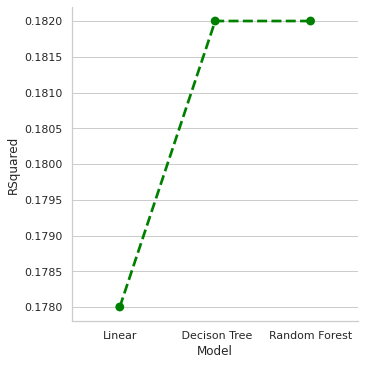

In [ ]:
#plotting adjusted r squared
sns.catplot(x="Model", y="RSquared", linestyles=["--"], color ="green", kind="point", data=rsqdt)

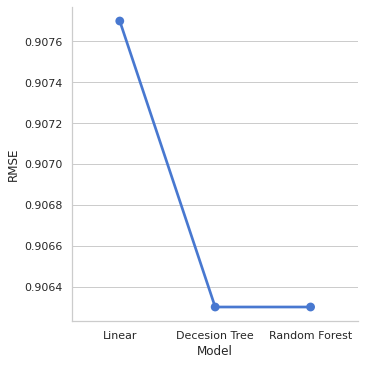

In [ ]:
#pot for RMSE between three models
sns.catplot(x="Model", y="RMSE", linestyles=["-"],
            kind="point", data=rmsedf)